# 📊 Clase 2: Visualización de Datos en Python con Matplotlib

En esta clase aprenderás a crear gráficos básicos y avanzados en Python usando la librería Matplotlib, aplicados a datos reales de sensores geotécnicos. Comenzaremos con lo más simple y avanzaremos hacia visualizaciones más complejas y útiles para el análisis de ingeniería.

---

**¿Qué aprenderás?**
- Cómo cargar y preparar datos reales de sensores.
- Cómo crear gráficos de línea, boxplots, histogramas y gráficos con doble eje.
- Cómo detectar y visualizar valores atípicos (outliers).
- Cómo interpretar visualmente la variabilidad y anomalías en los datos.
- Cómo resaltar zonas de interés en los gráficos usando colores.

## 1. Introducción a Matplotlib

Matplotlib es la librería más popular para crear gráficos en Python. Permite desde gráficos sencillos hasta visualizaciones avanzadas y personalizadas.

- Instalación: `!pip install matplotlib`
- Importación: `import matplotlib.pyplot as plt`

> **Tip:** Si usas Google Colab o Jupyter, puedes ejecutar la celda de instalación directamente.

## ¿Por qué es importante la visualización de datos en ingeniería?

La visualización de datos permite identificar patrones, anomalías y tendencias en los datos de sensores, facilitando la toma de decisiones en proyectos de ingeniería y geotecnia. En esta clase aprenderás a:

- Crear gráficos básicos y avanzados con Matplotlib.
- Interpretar visualmente datos de sensores reales.
- Detectar valores atípicos y anomalías.
- Comparar variables y analizar relaciones.

¡Vamos paso a paso para que puedas aplicar estos conceptos en tus propios proyectos!

## 2. Cargar y preparar los datos

Vamos a integrar y preparar los datos de sensores para graficar. Esto es fundamental para cualquier análisis visual.

In [63]:
# Integración de series de tiempo de sensores
import pandas as pd

# Cargar los datos de los sensores
df_humedad  = pd.read_csv('../data/humedad.csv', index_col=0)
df_pluviometro = pd.read_csv("../data/pluviometro.csv", index_col=0)
df_extensometro = pd.read_csv("../data/extensometro.csv", index_col=0)
df_acelerometro = pd.read_csv("../data/acelerometro.csv", index_col=0)

# Convertir los índices a fechas
for df_sensor in [df_humedad, df_pluviometro, df_extensometro, df_acelerometro]:
    df_sensor.index = pd.to_datetime(df_sensor.index)

# Unir todos los datos en un solo DataFrame
df = pd.concat([df_humedad, df_pluviometro, df_extensometro, df_acelerometro], axis=1)
df['p'] = df[['p1', 'p2']].max(axis=1)
df = df.drop(columns=['p1', 'p2'])
df.to_csv("../data/df_ancon.csv", index=True)

## 3. Primer gráfico: línea simple

Graficaremos una sola variable (por ejemplo, humedad) para ver cómo evoluciona en el tiempo. Este es el punto de partida para cualquier análisis visual.

In [64]:
import matplotlib.pyplot as plt

df = pd.read_csv('../data/df_ancon.csv', index_col=0)
df.index = pd.to_datetime(df.index)

df

,sh1,DE1,C1,B1,Tem_1,p
2019-05-03 16:00:00,NaN,NaN,NaN,NaN,NaN,0.0
2019-05-03 16:05:00,NaN,NaN,NaN,NaN,NaN,0.0
2019-05-03 16:10:00,NaN,NaN,NaN,NaN,NaN,0.0
2019-05-03 16:15:00,NaN,NaN,NaN,NaN,NaN,0.0
2019-05-03 16:20:00,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
2021-07-07 23:56:00,NaN,0.0,NaN,NaN,NaN,NaN
2021-07-07 23:57:00,NaN,0.0,NaN,NaN,NaN,NaN
2021-07-07 23:58:00,NaN,0.0,NaN,NaN,NaN,NaN
2021-07-07 23:59:00,NaN,0.0,NaN,NaN,NaN,NaN


In [65]:
df['p']

2019-05-03 16:00:00    0.0
2019-05-03 16:05:00    0.0
2019-05-03 16:10:00    0.0
2019-05-03 16:15:00    0.0
2019-05-03 16:20:00    0.0
                      ... 
2021-07-07 23:56:00    NaN
2021-07-07 23:57:00    NaN
2021-07-07 23:58:00    NaN
2021-07-07 23:59:00    NaN
2021-07-08 00:00:00    0.0
Name: p, Length: 1067337, dtype: float64

In [66]:
df['p'].isna().sum()

np.int64(837992)

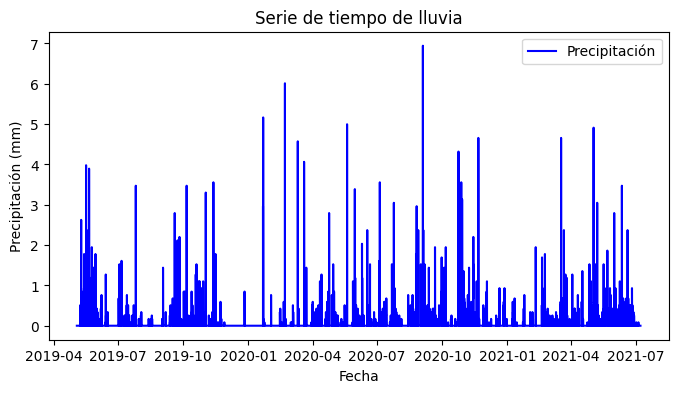

In [67]:
pluviometro = df['p'].dropna()

plt.figure(figsize=(8, 4))
plt.plot(pluviometro.dropna().index, pluviometro.dropna(), color='blue', label='Precipitación')
plt.title('Serie de tiempo de lluvia')
plt.xlabel('Fecha')
plt.ylabel('Precipitación (mm)')
plt.legend()
plt.show()

## 4. Limpieza de datos

Antes de graficar, es importante limpiar valores negativos o nulos.

In [68]:
# Reemplazar valores negativos y nulos en extensómetro
df['DE1'] = df['DE1'].clip(lower=0).fillna(0)

## 5. Gráfica de varias variables

Ahora agregamos más variables al mismo gráfico para comparar tendencias y relaciones entre sensores.

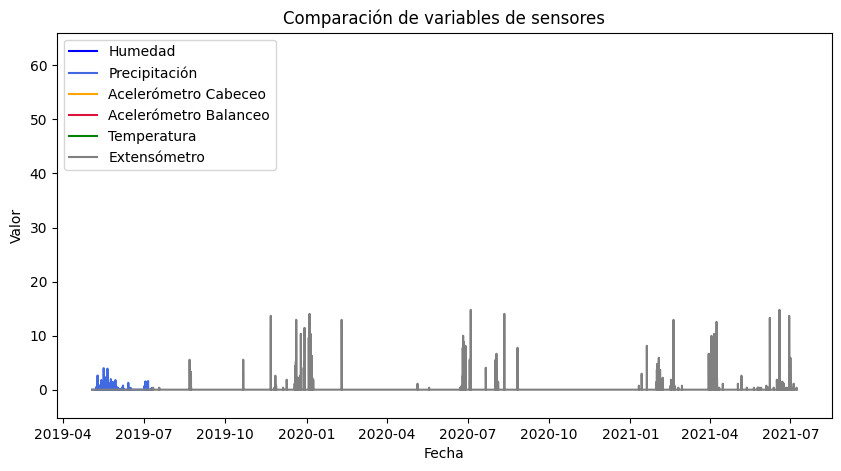

In [69]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['sh1'], color='blue', label='Humedad')
plt.plot(df.index, df['p'], color='royalblue', label='Precipitación')
plt.plot(df.index, df['C1'], color='orange', label='Acelerómetro Cabeceo')
plt.plot(df.index, df['B1'], color='crimson', label='Acelerómetro Balanceo')
plt.plot(df.index, df['Tem_1'], color='green', label='Temperatura')
plt.plot(df.index, df['DE1'], color='gray', label='Extensómetro')
plt.title('Comparación de variables de sensores')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

## 6. Remuestreo y agregación de datos

Para análisis más claros, podemos agrupar los datos por día, semana, etc.

In [70]:
df = df.resample('1D').agg({
    'sh1': 'mean',
    'p': 'sum',
    'C1': 'mean',
    'B1': 'mean',
    'Tem_1': 'mean',
    'DE1': 'sum'
})

## 7. Boxplot: visualización de la dispersión y outliers

El boxplot es útil para detectar valores atípicos en los datos. Observa la dispersión y posibles anomalías en el extensómetro.

### ¿Qué es un boxplot y cómo se interpreta?

Un boxplot (diagrama de caja) resume la distribución de una variable:
- **Caja**: entre el primer cuartil (Q1) y el tercer cuartil (Q3), donde se encuentra el 50% central de los datos (zona normal).
- **Bigotes**: valores que están fuera de la caja pero dentro de 1.5 veces el rango intercuartílico (IQR) desde Q1 o Q3 (zona de precaución).
- **Puntos**: valores fuera de los bigotes, considerados outliers (zona de alerta).

Esto ayuda a identificar rápidamente valores normales, atípicos y extremos.

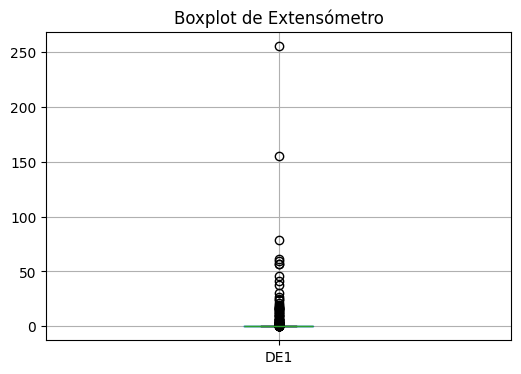

In [71]:
plt.figure(figsize=(6, 4))
df.boxplot(column=['DE1'])
plt.title('Boxplot de Extensómetro')
plt.show()

**Interpretación de la gráfica:**
- La zona verde indica valores normales de humedad.
- Las zonas naranjas muestran valores que requieren atención, aunque no son necesariamente anómalos.
- Las zonas rojas corresponden a valores atípicos (outliers), que pueden indicar errores de sensor o eventos inusuales.

Esta visualización ayuda a identificar rápidamente cuándo la humedad está en rangos normales, de precaución o de alerta.

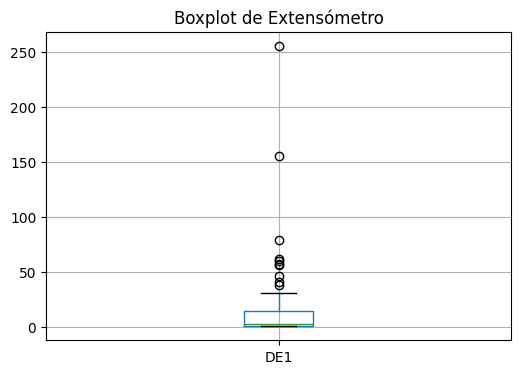

In [72]:
condicion = df['DE1'] > 0

plt.figure(figsize=(6, 4))
df[condicion].boxplot(column=['DE1'])
plt.title('Boxplot de Extensómetro')
plt.show()

## 8. Detección de anomalías con líneas de referencia

Podemos agregar líneas de media y límites para identificar valores fuera de lo normal. Esto es clave para análisis de calidad de datos.

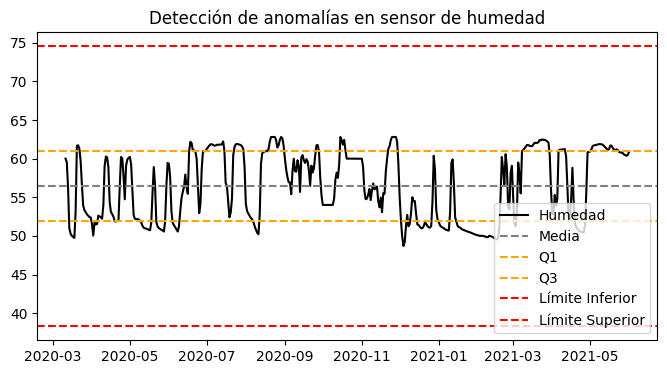

In [73]:
media = df['sh1'].mean()
Q1 = df['sh1'].quantile(0.25)
Q3 = df['sh1'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

plt.figure(figsize=(8, 4))
plt.plot(df.index, df['sh1'], color='black', label='Humedad')
plt.axhline(y=media, color='gray', linestyle='--', label='Media')
plt.axhline(y=Q1, color='orange', linestyle='--', label='Q1')
plt.axhline(y=Q3, color='orange', linestyle='--', label='Q3')
plt.axhline(y=limite_inferior, color='red', linestyle='--', label='Límite Inferior')
plt.axhline(y=limite_superior, color='red', linestyle='--', label='Límite Superior')
plt.title('Detección de anomalías en sensor de humedad')
plt.legend()
plt.show()

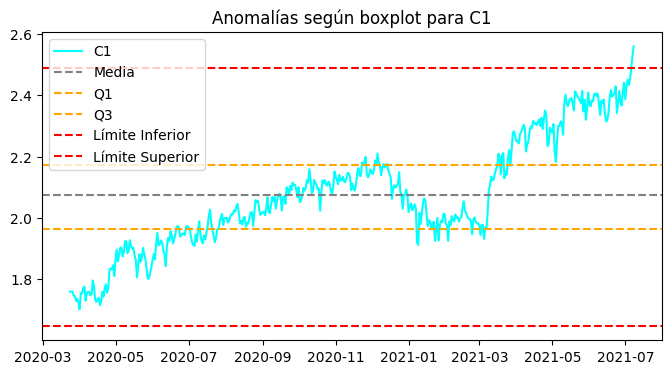

In [74]:
def graficar_anomalias(df, columna):
    datos = df[columna][df[columna] > 0] if columna in ['p', 'DE1'] else df[columna]
    media = datos.mean()
    Q1 = datos.quantile(0.25)
    Q3 = datos.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    plt.figure(figsize=(8, 4))
    plt.plot(df.index, df[columna], color='cyan', label=columna)
    plt.axhline(y=media, color='gray', linestyle='--', label='Media')
    plt.axhline(y=Q1, color='orange', linestyle='--', label='Q1')
    plt.axhline(y=Q3, color='orange', linestyle='--', label='Q3')
    plt.axhline(y=limite_inferior, color='red', linestyle='--', label='Límite Inferior')
    plt.axhline(y=limite_superior, color='red', linestyle='--', label='Límite Superior')
    plt.title(f"Anomalías según boxplot para {columna}")
    plt.legend()
    plt.show()

# Ejemplo de uso
graficar_anomalias(df, 'C1')

## 9. Visualización de zonas según boxplot (sensor de humedad)

En este gráfico, coloreamos el fondo según los límites del boxplot:
- **Verde:** valores normales (entre Q1 y Q3)
- **Naranja:** valores entre los bigotes y los cuartiles
- **Rojo:** valores fuera de los bigotes (outliers)

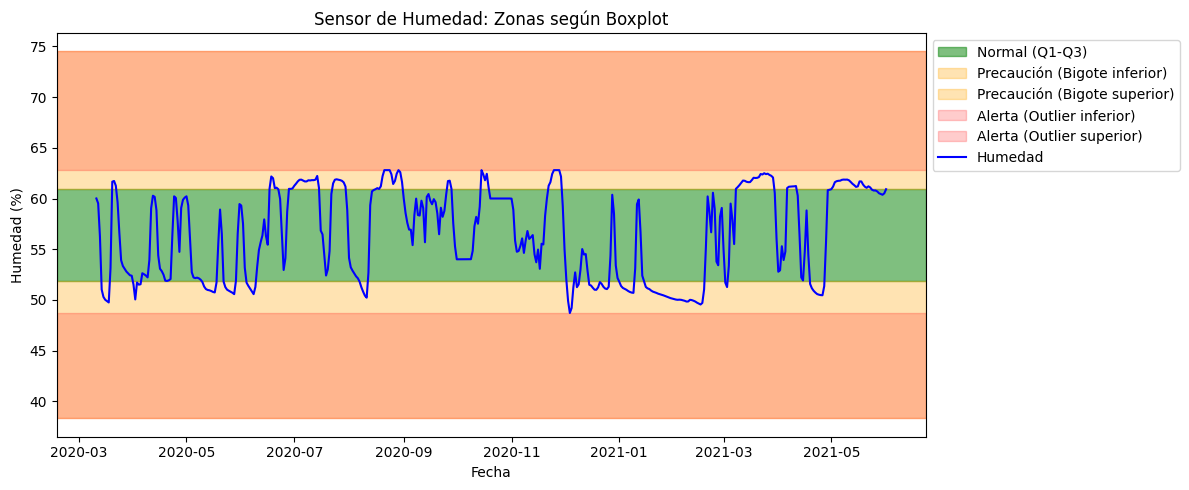

In [75]:
humedad = df['sh1'].dropna()
Q1 = humedad.quantile(0.25)
Q3 = humedad.quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

plt.figure(figsize=(12, 5))

# Colorear zonas
plt.axhspan(Q1, Q3, color='green', alpha=0.5, label='Normal (Q1-Q3)')
plt.axhspan(limite_inferior, Q1, color='orange', alpha=0.3, label='Precaución (Bigote inferior)')
plt.axhspan(Q3, limite_superior, color='orange', alpha=0.3, label='Precaución (Bigote superior)')
plt.axhspan(humedad.min(), limite_inferior, color='red', alpha=0.2, label='Alerta (Outlier inferior)')
plt.axhspan(limite_superior, humedad.max(), color='red', alpha=0.2, label='Alerta (Outlier superior)')

# Serie de humedad
plt.plot(humedad.index, humedad, color='blue', label='Humedad')
plt.title('Sensor de Humedad: Zonas según Boxplot')
plt.xlabel('Fecha')
plt.ylabel('Humedad (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

## 10. Histogramas: distribución de variables

Los histogramas muestran la frecuencia de los valores y ayudan a entender la dispersión.

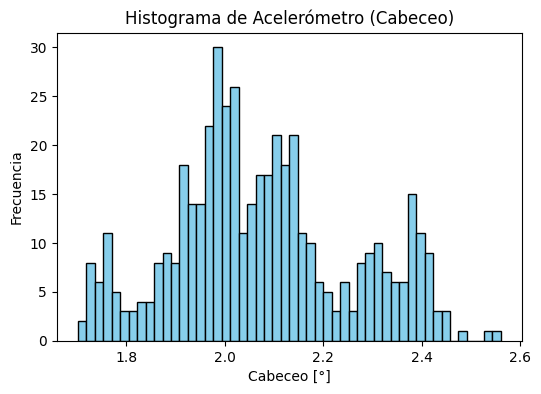

In [76]:
plt.figure(figsize=(6, 4))
plt.hist(df['C1'], bins=50, color='skyblue', edgecolor='k')
plt.title('Histograma de Acelerómetro (Cabeceo)')
plt.xlabel('Cabeceo [°]')
plt.ylabel('Frecuencia')
plt.show()

## 11. Gráficas con doble eje y comparación de variables

Podemos comparar dos variables con diferentes escalas usando dos ejes y.

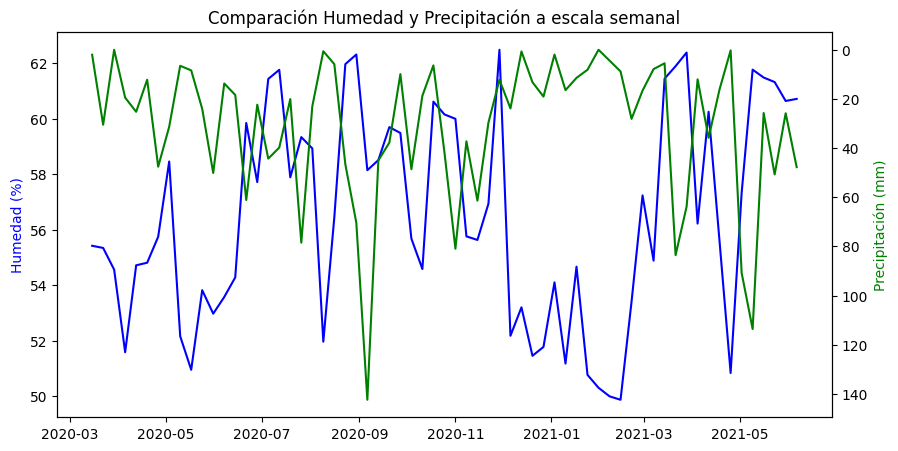

In [77]:
df_copia = df[~df['sh1'].isna()]
df_copia = df_copia.resample('1W').agg({'sh1': 'mean', 'p': 'sum'})

plt.figure(figsize=(10, 5))
ax1 = plt.gca()
ax1.plot(df_copia.index, df_copia['sh1'], color='blue', label='Humedad')
ax1.set_ylabel('Humedad (%)', color='blue')
ax2 = ax1.twinx()
ax2.plot(df_copia.index, df_copia['p'], color='green', label='Precipitación')
ax2.set_ylabel('Precipitación (mm)', color='green')
ax2.invert_yaxis()
plt.title('Comparación Humedad y Precipitación a escala semanal')
plt.show()

Exportamos cambios realizados en las series.

In [79]:
df.to_csv("../data/df_ancon.csv", index=True)

---

Con esto, has aprendido a crear desde gráficos simples hasta visualizaciones avanzadas y útiles para el análisis de datos de sensores en ingeniería geotécnica. ¡Experimenta cambiando variables y parámetros para profundizar tu comprensión!

**¿Qué más podrías explorar?**
- Personalización avanzada de gráficos (colores, estilos, anotaciones).
- Guardar gráficos como imágenes (`plt.savefig('nombre.png')`).
- Gráficas de dispersión para comparar múltiples variables.

¡Sigue practicando y visualiza tus propios datos!

## 📝 Ejercicios propuestos

1. Cambia los parámetros de remuestreo (por ejemplo, de semanal a mensual) y observa cómo cambian los gráficos.
2. Prueba la función de detección de anomalías con otras variables del DataFrame.
3. Modifica los colores de las zonas en la gráfica de humedad para personalizar la visualización.

## 📚 Conclusión y recursos adicionales

Has aprendido a crear e interpretar diferentes tipos de gráficos en Python usando datos reales de sensores. La visualización es clave para el análisis y la toma de decisiones en ingeniería.

**Recursos útiles:**
- [Documentación oficial de Matplotlib](https://matplotlib.org/stable/contents.html)
- [Cheat sheet de Matplotlib (PDF)](https://matplotlib.org/cheatsheets/)

¡Sigue practicando y experimentando con tus propios datos!